# **Flight Price Prediction Notebook**

# **Outline**
1. Introduction
2. Data Preparation
    - 2.1 Importing neccessary packages
    - 2.2 Load the data
    - 2.3 Check for data cleanliness
3. Exploratory Data Analysis
    - 3.1 Understanding the data
    - 3.2 Visualizations
4. Data Preprocessing
5. Modeling


# **1. Introduction**

> We are given a dataset of flight prices, obtained from Kaggle, the main objective of this notebook is to extract meaningful information from the data, and based on that, building a predictive model to predict the price of a flight accordingly.

## Data Parameters

- `airline`: the airline brand
- `flight`: the flight id
- `source_city`: the departure location of the flight
- `departure_time`: the departure time of the flight (period of the day, not the exact time)
- `stops`: number of stops between the departure and arrival destination
- `arrival_time`: the period of the day where the flight arrive
- `destination_city`: the destination of the flight
- `class`: seat class, either Economy or Business
- `duration`: the fight duration
- `days_left`: days left until the flight since booking day
- `price`: the price of the ticket

# **2. Data preparation**

## 2.1. Importing neccessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

## 2.2. Load the data

In [3]:
df = pd.read_csv("data/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

## 2.3. Check for data cleanliness

The data consists of 1 unneccessary column ("Unnamed: 0"), let's remove that

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Check for null data

In [6]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

From the result, we can clearly see that the data has no null value, therefore, it is ready to use.

# **3. Exploratory Data Analysis**

## 3.1. Understanding the data

Check the packaging

In [7]:
print("Shape: " + str(df.shape))
df.info()

Shape: (300153, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Let's have a look at the categorical variables

In [9]:
cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left']
for col in cat_cols:
    print("Column: " + col)
    print(df[col].value_counts())
    print("")
    print('---------------------------------------')
    print("")

Column: airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

---------------------------------------

Column: flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

---------------------------------------

Column: source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

---------------------------------------

Column: departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

---------------------------------------

Column: stops
one            250863
zero            36004
two_or_more     

Average price by each airline

In [21]:
df.groupby(['airline'], as_index = False)['price'].mean()

,airline,price
0,AirAsia,4091.072742
1,Air_India,23507.019112
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
4,SpiceJet,6179.278881
5,Vistara,30396.536302


## 3.2. Visualizations

Let's visualize and explore some categorical features

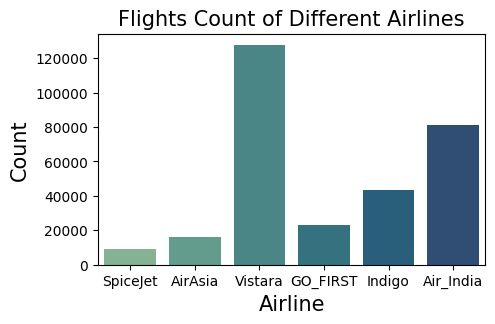

In [10]:
plt.figure(figsize=(5,3))
sb.countplot(df, x = 'airline', palette = "crest")  
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Departure and Arrival time period comparison

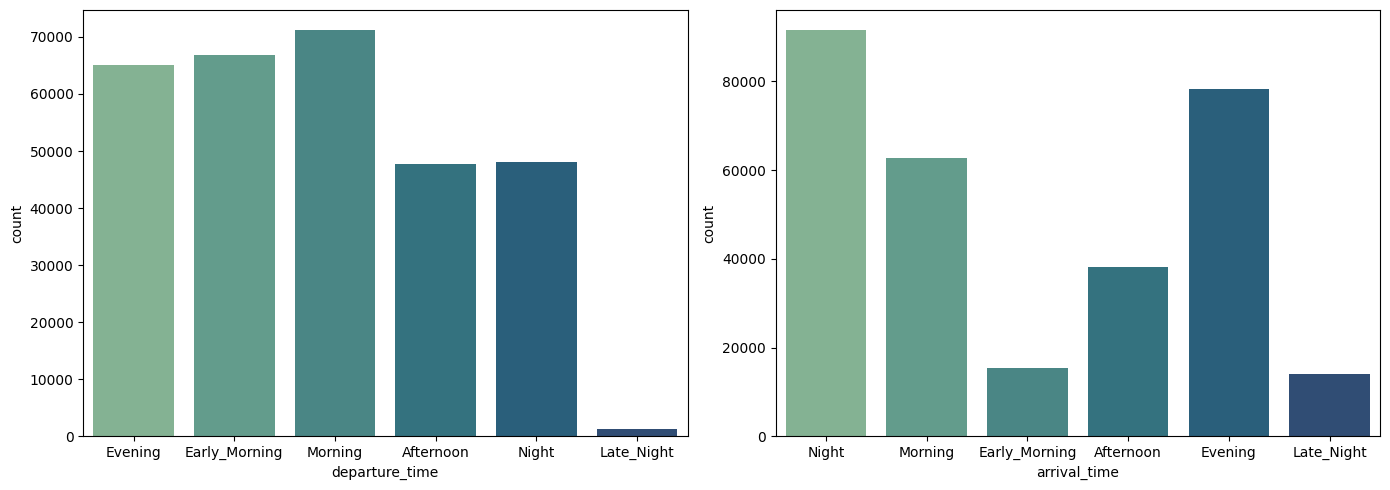

In [11]:
f,axs = plt.subplots(1,2,figsize=(14,5))
dep_arr = ['departure_time', 'arrival_time']

for i,ax in enumerate(axs.flatten()):
    # Plot the data
    sb.countplot(data=df, x=dep_arr[i],ax=ax, palette = "crest")

plt.tight_layout()


Flight class distribution

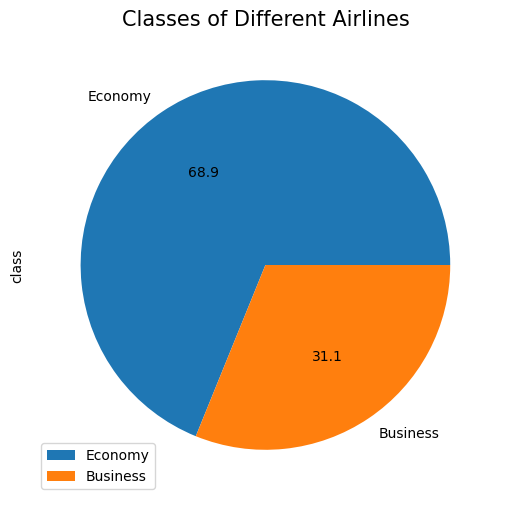

In [12]:
plt.figure(figsize=(8,6))
df['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.1f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Ticket cost distribution

Text(0, 0.5, 'Counts')

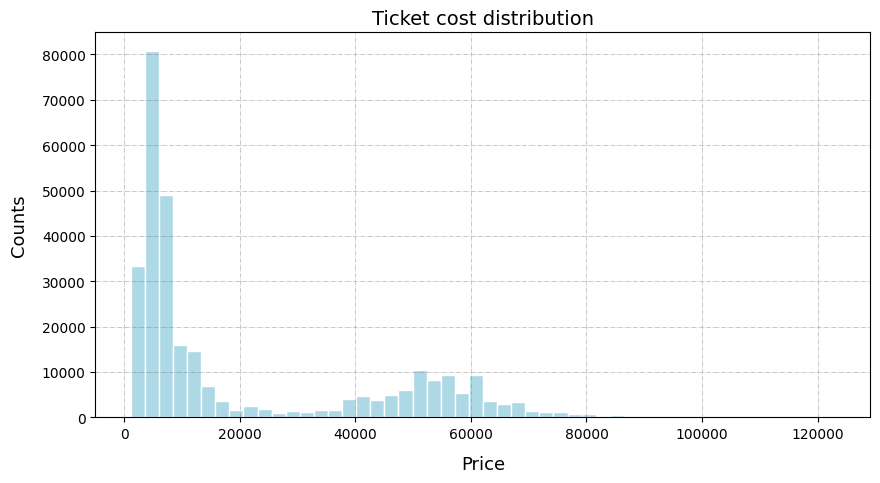

In [13]:
plt.figure(figsize = (10,5))
plt.hist(df['price'], bins = 50, histtype = 'bar', color = 'lightblue', ec = 'white')
plt.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.title('Ticket cost distribution', fontsize = 14)
plt.xlabel('Price',fontsize = 13, labelpad = 10)
plt.ylabel('Counts',fontsize = 13, labelpad = 10)

How does the airline affects the price?

<AxesSubplot: title={'center': 'Airlines Vs Price'}, xlabel='airline', ylabel='price'>

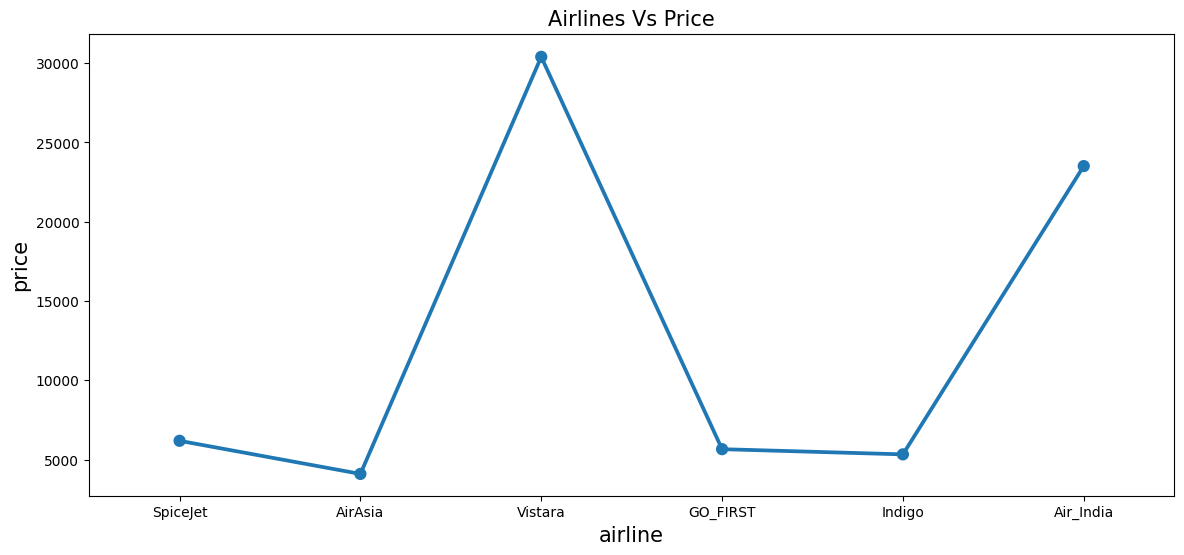

In [14]:
col2 = ['airline']

plt.subplots(1,1,figsize=(14,6))
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
sb.pointplot(x='airline',y='price',data=df)

Flight duration relation with Ticket price on different classes

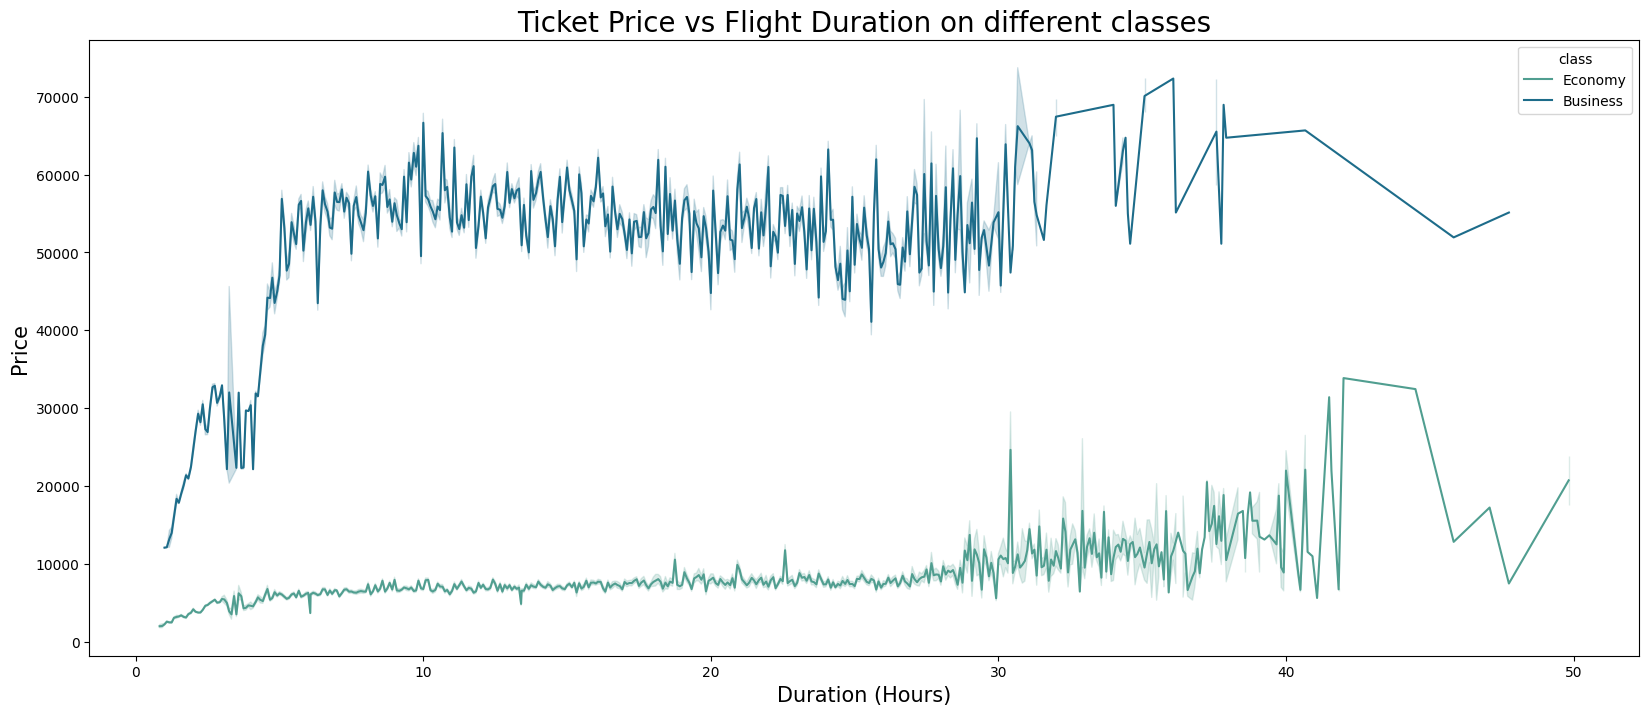

In [15]:
plt.figure(figsize=(20,8))
sb.lineplot(data=df,x='duration',y='price',hue='class',palette='crest')
plt.title('Ticket Price vs Flight Duration on different classes',fontsize=20)
plt.xlabel('Duration (Hours)',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Days left until departure vs ticket price

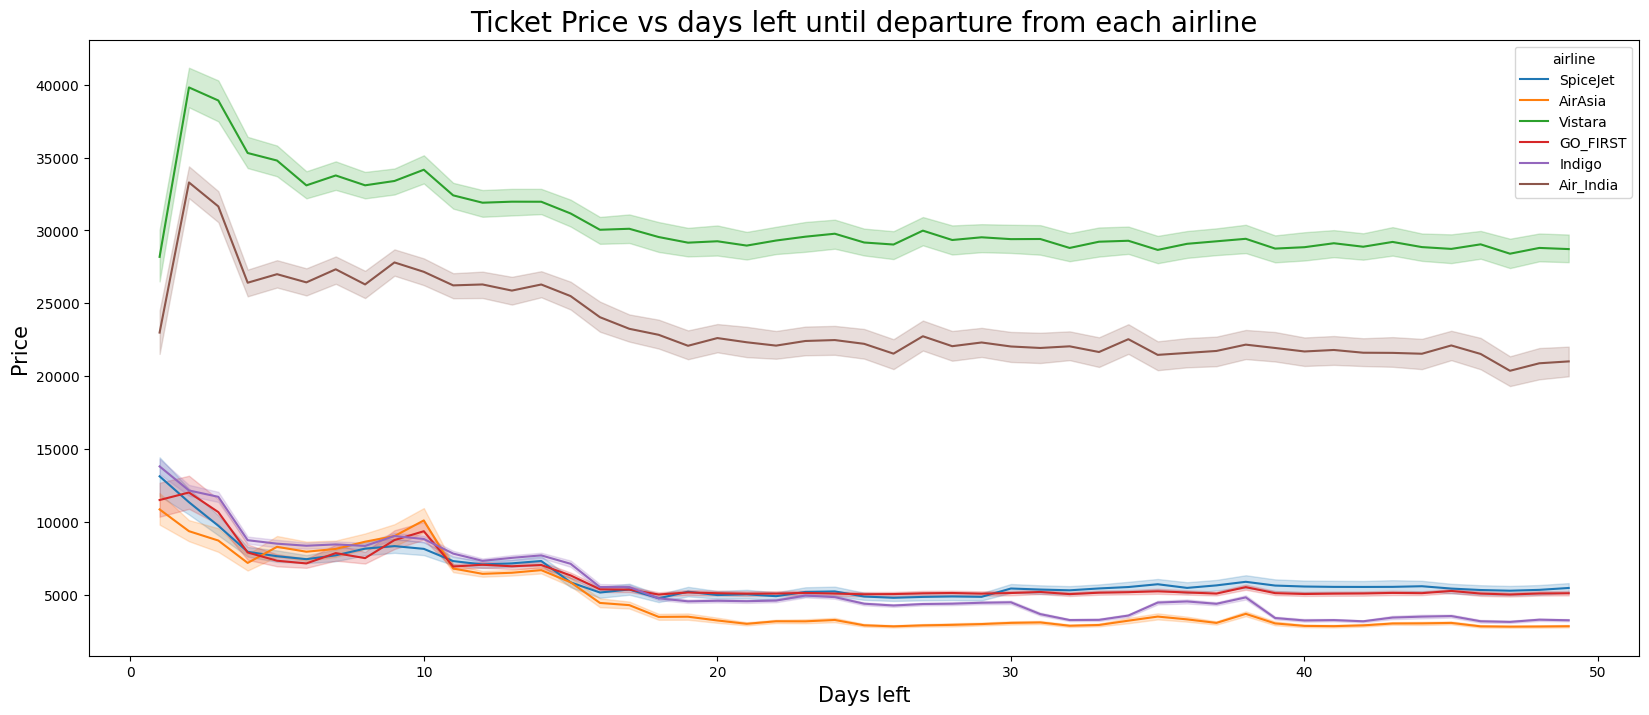

In [20]:
plt.figure(figsize=(20,8))
sb.lineplot(data=df,x='days_left',y='price', hue = 'airline')
plt.title('Ticket Price vs days left until departure from each airline',fontsize=20)
plt.xlabel('Days left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **4. Data Preprocessing**

In [24]:
# Create a copy of original dataframe
df1 = df.copy()

# Re-address the categorical columns
cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left']

# Encoding
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# Splitting features and target
X = df1.drop(['price'], axis = 1)
y = df1[['price']]

# Scaling the data


Split data into training and test set

# **5. Modeling**

We will try 2 methods, using sklearn and tensorflow models.

First, import sklearn models first.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluations
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error